
## In this exercise, we will use the HR dataset and understand the following:

> 1. Building the logistic regression model
2. Writing the model equation and interpreting the model summary
3. Creating the Confusion Matrix
4. Using mis-classification cost as a criteria to select the best cut-off
5. Using Younden Index as the criteria to select the best cut-off
6. Creating the Confusion Matrix and ROC plot on test data
9. Changing the base or reference category and evaluate the impact on the model (This is self work/assignment)
10. Change the cut-off value using model 1 (This is self work/assignment)

***

# Code starts here

To know the environment with the pyhton kernal



In [1]:
import sys, os

sys.executable

'C:\\Users\\Administrator\\Anaconda3\\python.exe'

We are going to use below mentioned libraries for **data import, processing and visulization**. As we progress, we will use other specific libraries for model building and evaluation. 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 


## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



modify the ast_note_interactivity kernel option to see the value of multiple statements at once.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#raw.data <- read.csv("/Users/Rahul/Documents/Datasets/IMB533_HR_Data_No_Missing_Value.csv", 
#                     header = TRUE,sep = ",",na.strings = c(""," ", "NA"))


raw_df = pd.read_csv( "C:/Users/Administrator/Desktop/Data_Science_with_Python_and_R/Code files/Dataset/HR_Data_No_Missing_Value.csv", 
                        sep = ',', na_values = ['', ' '])

raw_df.columns = raw_df.columns.str.lower().str.replace('.', '_')
raw_df.head()


,slno,candidate_ref,doj_extended,duration_to_accept_offer,notice_period,offered_band,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [ ]:
str(raw_df)

In [ ]:
#?pd.read_csv

Dropping SLNo and Candidate.Ref as these will not be used for any analysis or model building.

In [ ]:
#?raw_df.drop()

In [5]:
if set(['slno','candidate_ref']).issubset(raw_df.columns):
    raw_df.drop(['slno','candidate_ref'],axis=1, inplace=True)
    
raw_df.head()


,doj_extended,duration_to_accept_offer,notice_period,offered_band,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined



### 2. Structure of the dataset



In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 16 columns):
doj_extended                   8995 non-null object
duration_to_accept_offer       8995 non-null int64
notice_period                  8995 non-null int64
offered_band                   8995 non-null object
pecent_hike_expected_in_ctc    8995 non-null float64
percent_hike_offered_in_ctc    8995 non-null float64
percent_difference_ctc         8995 non-null float64
joining_bonus                  8995 non-null object
candidate_relocate_actual      8995 non-null object
gender                         8995 non-null object
candidate_source               8995 non-null object
rex_in_yrs                     8995 non-null int64
lob                            8995 non-null object
location                       8995 non-null object
age                            8995 non-null int64
status                         8995 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


In [27]:
raw_df.status.value_counts()
raw_df.doj_extended.value_counts()
raw_df.describe(include='all').transpose()

Joined        7313
Not Joined    1682
Name: status, dtype: int64

No     4788
Yes    4207
Name: doj_extended, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
doj_extended,8995,2,No,4788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_to_accept_offer,8995,NaN,NaN,NaN,21.4345,25.8116,0,3,10,33,224
notice_period,8995,NaN,NaN,NaN,39.2918,22.2202,0,30,30,60,120
offered_band,8995,4,E1,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pecent_hike_expected_in_ctc,8995,NaN,NaN,NaN,43.8648,29.789,-68.83,27.27,40,53.85,359.77
percent_hike_offered_in_ctc,8995,NaN,NaN,NaN,40.6574,36.0641,-60.53,22.09,36,50,471.43
percent_difference_ctc,8995,NaN,NaN,NaN,-1.5738,19.6107,-67.27,-8.33,0,0,300
joining_bonus,8995,2,No,8578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
candidate_relocate_actual,8995,2,No,7705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,8995,2,Male,7444,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get a help on the features of a object

In [ ]:
#?raw_df.status.value_counts()

### 2. Summarizing the dataset
Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed. The *dropna()* function is used for row wise deletion of missing value. The axis = 0 means row-wise, 1 means column wise.


In [8]:
filter_df = raw_df.dropna(axis=0, how='any', thresh=None, 
                             subset=None, inplace=False)

list(filter_df.columns )

['doj_extended',
 'duration_to_accept_offer',
 'notice_period',
 'offered_band',
 'pecent_hike_expected_in_ctc',
 'percent_hike_offered_in_ctc',
 'percent_difference_ctc',
 'joining_bonus',
 'candidate_relocate_actual',
 'gender',
 'candidate_source',
 'rex_in_yrs',
 'lob',
 'location',
 'age',
 'status']

In [ ]:
#?raw_df.dropna

We will first start by printing the unique labels in categorical features

In [9]:
numerical_features = ['duration_to_accept_offer','notice_period','pecent_hike_expected_in_ctc',
                      'percent_hike_offered_in_ctc','percent_difference_ctc','rex_in_yrs','age']

categorical_features = ['doj_extended','offered_band','joining_bonus','candidate_relocate_actual',
                        'gender','candidate_source','lob','location','status']

for f in categorical_features:
    print("\nThe unique labels in {} is {}\n".format(f, filter_df[f].unique()))
    print("The values in {} is \n{}\n".format(f,  filter_df[f].value_counts()))



The unique labels in doj_extended is ['Yes' 'No']

The values in doj_extended is 
No     4788
Yes    4207
Name: doj_extended, dtype: int64


The unique labels in offered_band is ['E2' 'E1' 'E3' 'E0']

The values in offered_band is 
E1    5568
E2    2711
E3     505
E0     211
Name: offered_band, dtype: int64


The unique labels in joining_bonus is ['No' 'Yes']

The values in joining_bonus is 
No     8578
Yes     417
Name: joining_bonus, dtype: int64


The unique labels in candidate_relocate_actual is ['No' 'Yes']

The values in candidate_relocate_actual is 
No     7705
Yes    1290
Name: candidate_relocate_actual, dtype: int64


The unique labels in gender is ['Female' 'Male']

The values in gender is 
Male      7444
Female    1551
Name: gender, dtype: int64


The unique labels in candidate_source is ['Agency' 'Employee Referral' 'Direct']

The values in candidate_source is 
Direct               4801
Agency               2585
Employee Referral    1609
Name: candidate_source, dtype: int6

Looking at the feature **line of business** it seems that *EAS, Healthcare and MMS* does not have enough observations and may be clubbed together

In [10]:
filter_df['lob']=np.where(filter_df['lob'] =='EAS', 'Others', filter_df['lob'])
filter_df['lob']=np.where(filter_df['lob'] =='Healthcare', 'Others', filter_df['lob'])
filter_df['lob']=np.where(filter_df['lob'] =='MMS', 'Others', filter_df['lob'])
filter_df.lob.value_counts()

INFRA     2850
ERS       2426
BFSI      1396
ETS        691
CSMP       579
AXON       568
Others     485
Name: lob, dtype: int64

We will use **groupby** function of pandas to get deeper insights of the behaviour of people **Joining** or **Not Joining** the company. We will write a generic function to report the mean by any categorical variable.

In [11]:
def group_by (categorical_features):
    return filter_df.groupby(categorical_features).mean()



In [12]:
group_by("doj_extended")
group_by("status")

,duration_to_accept_offer,notice_period,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,rex_in_yrs,age
doj_extended,,,,,,,
No,13.171261,36.381579,43.907550,40.923223,-1.443452,4.011696,29.699248
Yes,30.838840,42.603993,43.816154,40.354773,-1.722154,4.497742,30.156644


,duration_to_accept_offer,notice_period,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,rex_in_yrs,age
status,,,,,,,
Joined,20.624368,37.244633,43.860660,41.133205,-1.262036,4.192944,30.004102
Not Joined,24.956599,48.192628,43.882818,38.588460,-2.929298,4.439358,29.517836


### 3. Visualizing the Data

Plot can be done using the callable functions of 

>1. pandas library (http://pandas.pydata.org/pandas-docs/stable/visualization.html)
2. matplotlib library (https://matplotlib.org/) or
3. seaborn library (https://seaborn.pydata.org/) which is based on matplotlib and provides interface for drawing attractive statistical graphics.

#### 3a. Visualizing the Data using pandas

In [30]:
def hist_plot(data, group_by, xlabel,ylabel):
    pd.crosstab(data,group_by).plot(kind='density')
    plt.xlabel(xlabel, size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.title('Plot', size = 18)
    plt.grid(True)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((0,x2,y1,y2))
    plt.show()
    #plt.subplot(1, 2)

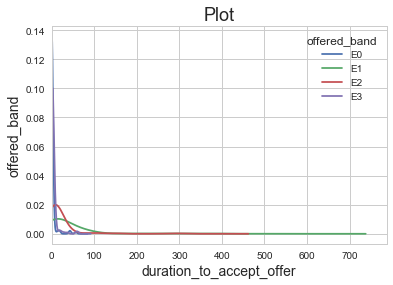

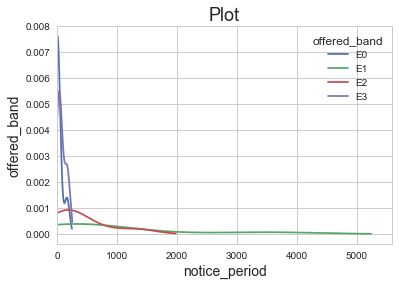

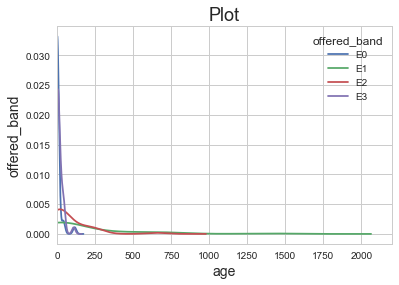

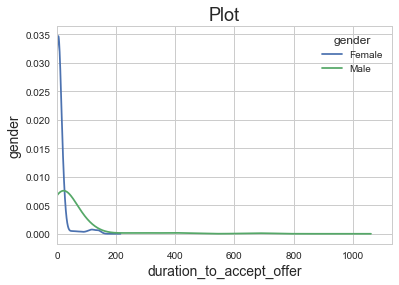

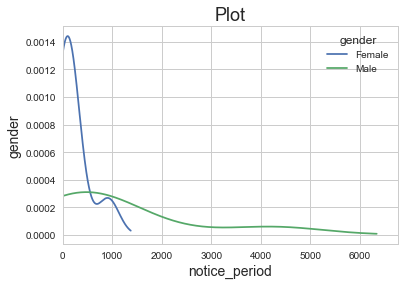

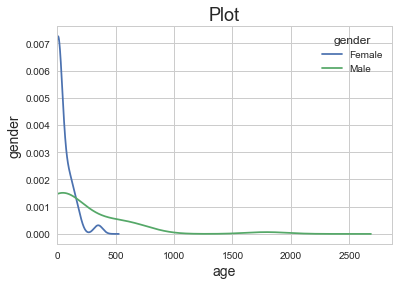

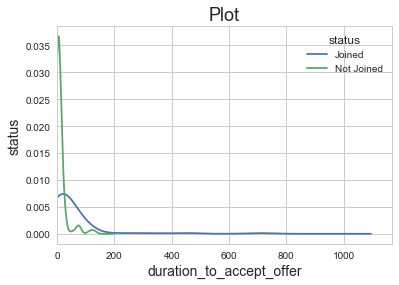

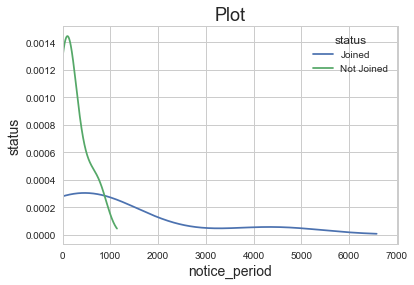

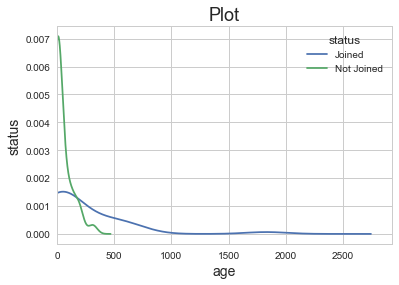

In [31]:
numerical_features_set = ['duration_to_accept_offer','notice_period','age']
categorical_features_set = ['offered_band','gender','status']

for c in categorical_features_set:
    for n in numerical_features_set:
        hist_plot(filter_df[n], filter_df[c], n,c)

#### 3b. Visulaztion using seaborn

The details about seaborn package can be found at: https://seaborn.pydata.org/

To do a simple scatter plot, we need to pass the pandas dataframe to seaborn pairplot function. The default output is as belows:

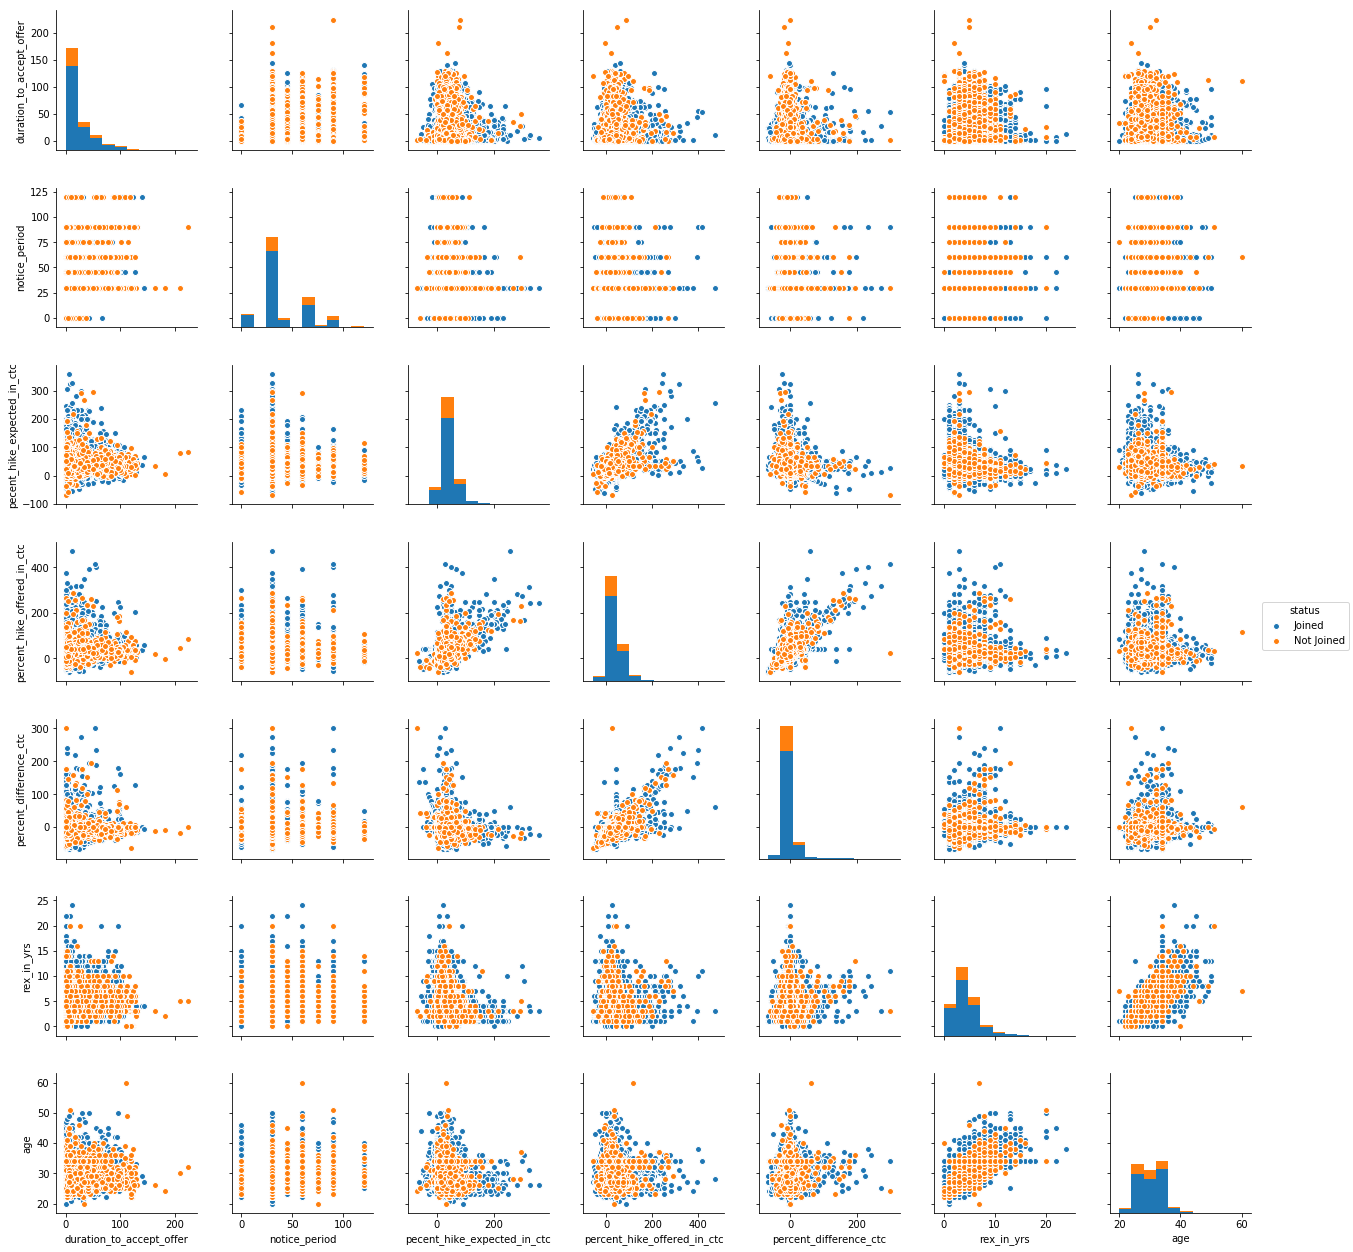

In [16]:
sn.pairplot(filter_df, hue="status")

The below code chunk draws a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

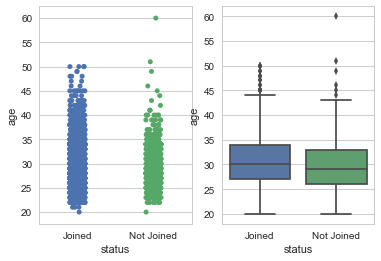

In [17]:
sn.set(style="whitegrid", color_codes=True)
fig, (ax1, ax2) = plt.subplots(1,2)

sn.stripplot(x='status', y='age', data=filter_df, jitter=True, ax = ax1)
sn.boxplot(x='status', y='age', data=filter_df, ax=ax2)

**violinplot()**, combines a boxplot with the kernel density estimation. This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin.

There are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

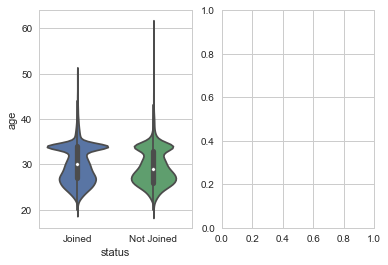

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)
sn.violinplot(x='status', y='age', data=filter_df, ax=ax1)

#sn.violinplot(x='status', y='age', data=filter_df,
#             split=True, inner="stick", palette="Set3", ax=ax2)

## Model Approach 1:  With dummy variable coding

### Dummy Variable coding

Remove the response variable from the dataset¶


In [19]:
X_features = list(filter_df.columns)
X_features.remove('status')
X_features.remove('pecent_hike_expected_in_ctc')
X_features.remove('percent_hike_offered_in_ctc')
X_features.remove('candidate_relocate_actual')

In [20]:
X_features

['doj_extended',
 'duration_to_accept_offer',
 'notice_period',
 'offered_band',
 'percent_difference_ctc',
 'joining_bonus',
 'gender',
 'candidate_source',
 'rex_in_yrs',
 'lob',
 'location',
 'age']

In [21]:
categorical_features = ['doj_extended','offered_band','joining_bonus','gender','candidate_source','lob','location']

In [22]:
#for i in categorical_features:
 #   if filter_df.dtypes.name = 'category'
encoded_X_df = pd.get_dummies( filter_df[X_features], columns = categorical_features, drop_first = True )
encoded_Y_df = pd.get_dummies( filter_df['status'], drop_first=False)

In [23]:
encoded_Y_df.columns

Index(['Joined', 'Not Joined'], dtype='object')

In [ ]:
#?pd.get_dummies

In [24]:
pd.options.display.max_columns = None
encoded_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 0 to 8994
Data columns (total 29 columns):
duration_to_accept_offer              8995 non-null int64
notice_period                         8995 non-null int64
percent_difference_ctc                8995 non-null float64
rex_in_yrs                            8995 non-null int64
age                                   8995 non-null int64
doj_extended_Yes                      8995 non-null uint8
offered_band_E1                       8995 non-null uint8
offered_band_E2                       8995 non-null uint8
offered_band_E3                       8995 non-null uint8
joining_bonus_Yes                     8995 non-null uint8
gender_Male                           8995 non-null uint8
candidate_source_Direct               8995 non-null uint8
candidate_source_Employee Referral    8995 non-null uint8
lob_BFSI                              8995 non-null uint8
lob_CSMP                              8995 non-null uint8
lob_ERS              

In [25]:
Y = encoded_Y_df.filter(['Joined'], axis =1)
X = encoded_X_df
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 0 to 8994
Data columns (total 1 columns):
Joined    8995 non-null uint8
dtypes: uint8(1)
memory usage: 399.1 KB


### Correlation amongst variable

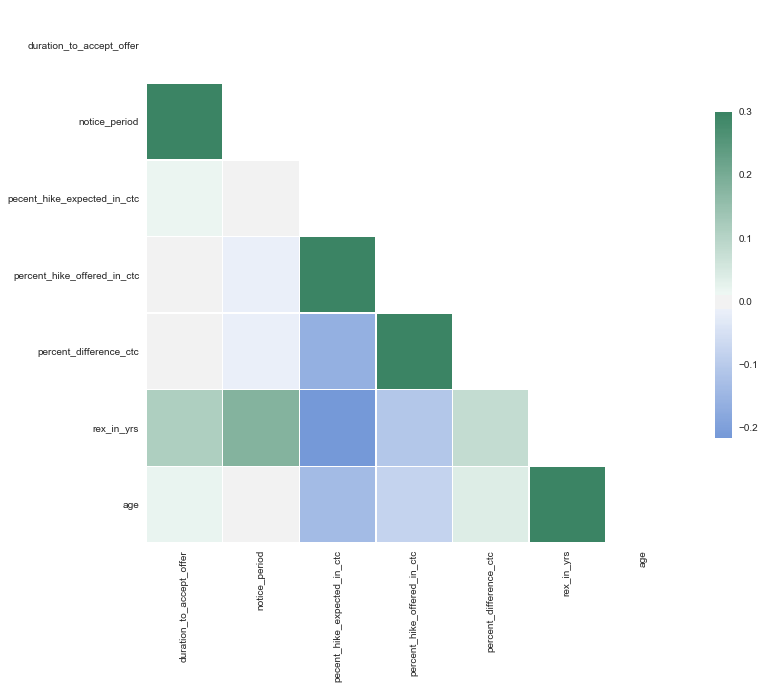

In [36]:
corr = filter_df.filter(numerical_features).corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(255, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Train and test data split using Python

The train and test split can also be done using the **sklearn module**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)

## Model Building: Using the **statsmodel.api** 



In [38]:
import statsmodels.api as sm
lg_model_1 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit()

lg_model_1.summary()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Joined   No. Observations:                 7196
Model:                            GLM   Df Residuals:                     7166
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3208.9
Date:                Sat, 16 Jun 2018   Deviance:                       6417.7
Time:                        12:40:10   Pearson chi2:                 7.26e+03
No. Iterations:                    22                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.7847      1.225     -1.457      0.145      -4.185       0.616
duration_to_accept_offer               0.0015      0.001      1.135      0.257      -0.001       0.004
notice_period                         -0.0213      0.001    -14.300      0.000      -0.024      -0.018
percent_difference_ctc                 0.0029      0.002      1.597      0.110      -0.001       0.007
rex_in_yrs                            -0.0552      0.022     -2.512      0.012      -0.098      -0.012
age                                    0.0453      0.010      4.437      0.000       0.025       0.065
doj_extended_Yes                       0.1164      0.070      1.674      0.094      -0.020       0.253
offered_band_E1                        1.1534      0.218      5.281      0.000       0.725       1.581
offered_band_E2                        0.9729      0.238      4.082      0.000       0.506       1.440
offered_band_E3                        1.2232      0.305      4.012      0.000       0.626       1.821
joining_bonus_Yes                      0.1017      0.152      0.669      0.504      -0.197       0.400
gender_Male                           -0.0769      0.087     -0.885      0.376      -0.247       0.093
candidate_source_Direct                0.3204      0.073      4.407      0.000       0.178       0.463
candidate_source_Employee Referral     0.7187      0.108      6.660      0.000       0.507       0.930
lob_BFSI                               0.1378      0.152      0.907      0.364      -0.160       0.436
lob_CSMP                               0.2776      0.176      1.577      0.115      -0.067       0.623
lob_ERS                                0.2273      0.143      1.590      0.112      -0.053       0.507
lob_ETS                                0.5430      0.171      3.170      0.002       0.207       0.879
lob_INFRA                              0.7048      0.156      4.506      0.000       0.398       1.011
lob_Others                             0.0453      0.176      0.257      0.797      -0.300       0.391
location_Bangalore                     1.2338      1.163      1.061      0.289      -1.046       3.513
location_Chennai                       1.2461      1.162      1.073      0.283      -1.031       3.523
location_Cochin                       22.6018   3.24e+04      0.001      0.999   -6.35e+04    6.35e+04
location_Gurgaon                       1.0596      1.183      0.896      0.370      -1.259       3.378
location_Hyderabad                     1.2898      1.171      1.101      0.271      -1.006       3.585
location_Kolkata                       1.3932      1.189      1.171      0.241      -0.938       3.724
location_Mumbai                        1.4642      1.187      1.234      0.217      -0.862       3.790
location_Noida                         1.6005      1.161      1.378     

## Model Approach 2:  Without dummy variable coding

In [41]:
import statsmodels.formula.api as smf

To print the name of all the models in any library

In [42]:
dir(smf)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PHReg',
 'Poisson',
 'Probit',
 'QuantReg',
 'RLM',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gee',
 'glm',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']


### 3. Create train and test dataset

#### Run a R code in python kernal

To run R code from within python kernal. 

* use pip to install rpy2 (if not already installed). (!pip install rmagic)
* Use conda not pip if the R installation is done using conda (!conda install -c r rpy2)

The rmagic function has moved to rpy2 and thus the installation of rpy2 is needed. Once done, use the below code to load rpy2.ipython and follow with the code. YOu willl find a note on using **%load_ext rmagic** but this does not work now.

#!pip install rmagic
#!conda install -c r rpy2


In [43]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#from rpy2.robjects import r, pandas2ri
#pandas2ri.activate()

#### Reserve 80% for **_training_** and 20% of **_test_**
Create training and test dataframe using R. Pass the dataframe back to Python kernal

In [44]:
%%R -i filter_df
library(caret)
set.seed(300)
trainIndex <- createDataPartition(filter_df$status, p = 0.80, list = FALSE)
train_df <- filter_df[trainIndex,] 
test_df <- filter_df[-trainIndex,]

In [45]:
%R -o train_df
train_df.head()

,doj_extended,duration_to_accept_offer,notice_period,offered_band,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [46]:
%R -o test_df
test_df.head()

,doj_extended,duration_to_accept_offer,notice_period,offered_band,pecent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
7,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Others,Noida,34,Joined
18,No,1,30,E1,-13.42,42.86,65.00,No,No,Male,Direct,1,INFRA,Gurgaon,34,Joined
20,No,1,0,E3,42.78,42.78,0.00,No,Yes,Male,Employee Referral,8,INFRA,Chennai,29,Joined
33,No,24,30,E2,20.48,23.95,2.88,No,No,Male,Direct,6,INFRA,Chennai,29,Not Joined
34,Yes,10,60,E3,25.00,29.17,3.33,No,No,Male,Employee Referral,6,INFRA,Noida,32,Joined


We can pull the specific attribute needed to build the model is another data frame. This again is more of a hygine practice to not touch the **train** and **test** data set directly.

In [47]:
lg_train_df = train_df.filter(['duration_to_accept_offer',
                               'notice_period',
                               'percent_difference_ctc',
                               'rex_in_yrs',
                               'age',
                               'doj_extended',
                               'offered_band',
#                               'pecent_hike_expected_in_ctc',
#                               'percent_hike_offered_in_ctc',
                               'joining_bonus',
#                               'candidate_relocate_actual',
                               'gender',
                               'candidate_source',
                               'lob',
                               'location',
                               'status'
                              ], axis = 1)

lg_test_df = test_df.filter(['duration_to_accept_offer',
                               'notice_period',
                               'percent_difference_ctc',
                               'rex_in_yrs',
                               'age',
                               'doj_extended',
                               'offered_band',
#                               'pecent_hike_expected_in_ctc',
#                               'percent_hike_offered_in_ctc',
                               'joining_bonus',
#                               'candidate_relocate_actual',
                               'gender',
                               'candidate_source',
                               'lob',
                               'location',
                               'status'
                              ], axis = 1)

lg_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7197 entries, 0 to 8994
Data columns (total 13 columns):
duration_to_accept_offer    7197 non-null int32
notice_period               7197 non-null int32
percent_difference_ctc      7197 non-null float64
rex_in_yrs                  7197 non-null int32
age                         7197 non-null int32
doj_extended                7197 non-null object
offered_band                7197 non-null object
joining_bonus               7197 non-null object
gender                      7197 non-null object
candidate_source            7197 non-null object
lob                         7197 non-null object
location                    7197 non-null object
status                      7197 non-null object
dtypes: float64(1), int32(4), object(8)
memory usage: 674.7+ KB


Writing the formula with the required set of variables to be used in model building

In [48]:
pass_formula = 'C(status) ~ \
            duration_to_accept_offer+ \
            notice_period + \
            percent_difference_ctc + \
            rex_in_yrs + \
            age + \
            C(doj_extended) + \
            C(offered_band) + \
            C(joining_bonus) + \
            C(gender) + \
            C(candidate_source) + \
            C(lob) + \
            C(location)'

In [50]:
lg_model_2 = smf.glm(formula=pass_formula, data=lg_train_df,family=sm.families.Binomial()).fit()
lg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Generalized Linear Model Regression Results                                
==========================================================================================================
Dep. Variable:     ['C(status)[Joined]', 'C(status)[Not Joined]']   No. Observations:                 7197
Model:                                                        GLM   Df Residuals:                     7167
Model Family:                                            Binomial   Df Model:                           29
Link Function:                                              logit   Scale:                             1.0
Method:                                                      IRLS   Log-Likelihood:                -3216.5
Date:                                            Sat, 16 Jun 2018   Deviance:                       6433.1
Time:                                                    12:53:50   Pearson chi2:                 7.27e+03
No. Iterations:                                                21                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.1920      1.323     -1.656      0.098      -4.786       0.402
C(doj_extended)[T.Yes]                       0.0765      0.070      1.096      0.273      -0.060       0.213
C(offered_band)[T.E1]                        1.2530      0.213      5.886      0.000       0.836       1.670
C(offered_band)[T.E2]                        1.0866      0.233      4.672      0.000       0.631       1.542
C(offered_band)[T.E3]                        1.3402      0.300      4.473      0.000       0.753       1.927
C(joining_bonus)[T.Yes]                     -0.0979      0.148     -0.661      0.509      -0.388       0.192
C(gender)[T.Male]                           -0.1600      0.088     -1.810      0.070      -0.333       0.013
C(candidate_source)[T.Direct]                0.3535      0.073      4.874      0.000       0.211       0.496
C(candidate_source)[T.Employee Referral]     0.7892      0.107      7.352      0.000       0.579       1.000
C(lob)[T.BFSI]                               0.0498      0.151      0.329      0.742      -0.246       0.346
C(lob)[T.CSMP]                               0.0438      0.173      0.253      0.800      -0.295       0.382
C(lob)[T.ERS]                                0.1724      0.143      1.207      0.228      -0.108       0.452
C(lob)[T.ETS]                                0.3731      0.170      2.196      0.028       0.040       0.706
C(lob)[T.INFRA]                              0.5906      0.156      3.775      0.000       0.284       0.897
C(lob)[T.Others]                             0.0281      0.179      0.157      0.875      -0.323       0.379
C(location)[T.Bangalore]                     1.6399      1.270      1.291      0.197      -0.850       4.129
C(location)[T.Chennai]                       1.6341      1.269      1.288      0.198      -0.853       4.121
C(location)[T.Cochin]                        1.3268      1.663      0.798      0.425      -1.933       4.587
C(location)[T.Gurgaon]                       1.8342      1.294      1.418      0.156      -0.701       4.370
C(location)[T.Hyderabad]                     1.6111      1.278      1.261      0.207      -0.893       4.116
C(location)[T.Kolkata]                       1.5442      1.293      1.195      0.232      -0.990       4.078
C(location)[T.Mumbai]                        1.8619      1.291      1.442      0.149      -0.668       4.392
C(location)[T.Noida]                         2.0139      1.269      1.588      0.112      -0.472       4.500
C(location)[T.Others]                       22.1

## Find the significant variables


In [51]:
def get_significant_vars (modelobject):
    var_p_vals_df = pd.DataFrame(modelobject.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [52]:
significant_vars_1 = get_significant_vars(lg_model_1)
significant_vars_1

significant_vars_2 = get_significant_vars(lg_model_2)
significant_vars_2

['notice_period',
 'rex_in_yrs',
 'age',
 'offered_band_E1',
 'offered_band_E2',
 'offered_band_E3',
 'candidate_source_Direct',
 'candidate_source_Employee Referral',
 'lob_ETS',
 'lob_INFRA']

['C(offered_band)[T.E1]',
 'C(offered_band)[T.E2]',
 'C(offered_band)[T.E3]',
 'C(candidate_source)[T.Direct]',
 'C(candidate_source)[T.Employee Referral]',
 'C(lob)[T.ETS]',
 'C(lob)[T.INFRA]',
 'duration_to_accept_offer',
 'notice_period',
 'percent_difference_ctc',
 'rex_in_yrs',
 'age']

## Model Evaluation


### 1. The prediction on train data.
Two ways to precit the outcome on the **train set**
> * Use **predict** function of the model object 
* Use **get_prediction** function of the model object

For the model with dummy variable coding explicetely done, we need to add the constant term to the test set. For the model with dummy variable coding carried out automatically, there is no need to add the constant term to the test set.

Below is the output from model with dummy variable coding

In [53]:
train_df_predict_1 = lg_model_1.predict(sm.add_constant(X_train))
train_df_predict_1.head()

train_df_predict_2 = lg_model_1.get_prediction(sm.add_constant(X_train))
train_df_predict_2.predicted_mean[0:5]

7842    0.899629
5268    0.847675
6800    0.716612
7146    0.601952
5304    0.754362
dtype: float64

array([0.89962927, 0.84767467, 0.71661219, 0.60195179, 0.75436165])

Here is the output with the model with no dummy variable coding

In [54]:
train_df_predict_3 = lg_model_2.predict(sm.add_constant(lg_train_df))
train_df_predict_3.head()

train_df_predict_4 = lg_model_2.get_prediction(lg_train_df)
train_df_predict_4.predicted_mean[0:5]

0    0.871328
1    0.953856
2    0.804548
3    0.949117
4    0.702935
dtype: float64

array([0.87132811, 0.95385554, 0.80454782, 0.94911713, 0.702935  ])

### 2. The prediction on test data.

The prediction can be carried out by **defining functions** as well. Below is one such instance wherein a function is defined and is used for prediction

In [55]:
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_prob': model.get_prediction(sm.add_constant(test_data)).predicted_mean})
    return y_pred_df

Giving label to the Y column of the test set by using the dictionary data type in python. This is being done for the model which was built using dummy variable coding. It will be used to generate confusion matrix at a later time

In [56]:
ser = y_test
status_dict = {1:"Joined", 0:"Not Joined"}
class_test_df = ser.replace(dict(Joined=status_dict))
class_test_df.rename({'Joined': 'status'}, axis='columns', inplace=True )
class_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1799 entries, 4622 to 8436
Data columns (total 1 columns):
status    1799 non-null object
dtypes: object(1)
memory usage: 28.1+ KB


In [57]:
model_1_pred_test_df = pd.DataFrame(get_predictions(class_test_df.status, lg_model_1, X_test))
model_1_pred_test_df.head()

model_2_pred_test_df = get_predictions( lg_test_df.status, lg_model_2, lg_test_df)
model_2_pred_test_df.head()

,actual,predicted_prob
4622,Joined,0.951218
1530,Joined,0.887529
8706,Joined,0.908352
2233,Joined,0.763085
676,Joined,0.920820


,actual,predicted_prob
7,Joined,0.936934
18,Joined,0.946619
20,Joined,0.947226
33,Not Joined,0.851944
34,Joined,0.913339


In [103]:
model_1_pred_test_df['predicted'] = model_1_pred_test_df.predicted_prob.map(lambda x: 'Joined' if x > 0.9 else 'Not Joined')
model_1_pred_test_df[0:10]


model_2_pred_test_df['predicted'] = model_2_pred_test_df.predicted_prob.map(lambda x: 'Joined' if x > 0.9 else 'Not Joined') 
model_2_pred_test_df[0:10]

,actual,predicted_prob,predicted
4622,Joined,0.951218,Joined
1530,Joined,0.887529,Not Joined
8706,Joined,0.908352,Joined
2233,Joined,0.763085,Not Joined
676,Joined,0.920820,Joined
6778,Joined,0.783545,Not Joined
2075,Not Joined,0.777212,Not Joined
6998,Not Joined,0.845174,Not Joined
8606,Not Joined,0.935241,Joined
7375,Joined,0.821034,Not Joined


,actual,predicted_prob,predicted,predicted_code,actual_code
7,Joined,0.936934,Joined,1,1
18,Joined,0.946619,Joined,1,1
20,Joined,0.947226,Joined,1,1
33,Not Joined,0.851944,Not Joined,1,0
34,Joined,0.913339,Joined,1,1
37,Joined,0.913552,Joined,1,1
40,Not Joined,0.945534,Joined,1,0
44,Joined,0.966781,Joined,1,1
47,Not Joined,0.944689,Joined,1,0
50,Joined,0.833929,Not Joined,1,1


### 3. Confusion Matrix

We will built classification matrix using the **metrics** method from **sklearn** package. We will also write a custom function to build a classification matrix and use it for reporting the performance measures.

#### 3a. Confusion Matrix using sklearn

In [104]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [105]:
print("The model 1 with dummy variable coding output: ")
confusion_matrix(class_test_df.status, model_1_pred_test_df.predicted)
model_1_report = (classification_report(class_test_df, model_1_pred_test_df.predicted))
print(model_1_report)

print("The model 2 without dummy variable coding output: ")  
confusion_matrix(lg_test_df.status, model_2_pred_test_df.predicted)
model_2_report = classification_report(lg_test_df.status, model_2_pred_test_df.predicted)
print(model_2_report)

The model 1 with dummy variable coding output: 


array([[ 336, 1123],
       [  31,  309]], dtype=int64)

             precision    recall  f1-score   support

     Joined       0.92      0.23      0.37      1459
 Not Joined       0.22      0.91      0.35       340

avg / total       0.78      0.36      0.36      1799

The model 2 without dummy variable coding output: 


array([[ 323, 1139],
       [  27,  309]], dtype=int64)

             precision    recall  f1-score   support

     Joined       0.92      0.22      0.36      1462
 Not Joined       0.21      0.92      0.35       336

avg / total       0.79      0.35      0.35      1798



#### 3b Confusion Matrix using generic function

In [106]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["Joined", "Not Joined"] , 
               yticklabels = ["Joined", "Not Joined"],cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 15);
    plt.show()

The classification matrix plot as reported by **model 1**  with dummy variable coding is:

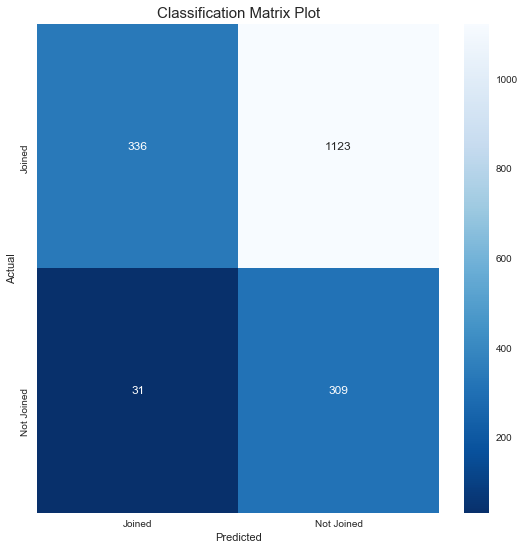

In [107]:
draw_cm( model_1_pred_test_df.actual, model_1_pred_test_df.predicted )

The classification matrix plot as reported by **model 2**  without dummy variable coding is:

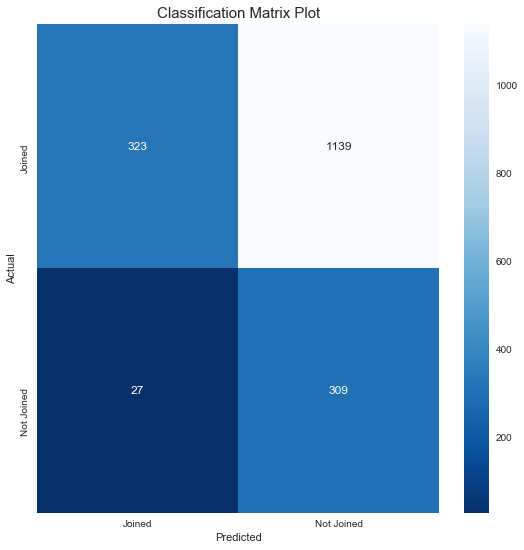

In [108]:
draw_cm( model_2_pred_test_df.actual, model_2_pred_test_df.predicted )

### 4. Performance Measure on the test set


In [109]:
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [110]:
cm = metrics.confusion_matrix(model_2_pred_test_df.actual, model_2_pred_test_df.predicted)

model_2_metrics_df = pd.DataFrame(measure_performance(cm))
model_2_metrics_df

print( 'Total Accuracy sklearn: ',np.round( metrics.accuracy_score( lg_test_df.status, model_2_pred_test_df.predicted ), 2 ) )

,overall_acc,precision,recall,sensitivity,specificity
0,0.35,0.92,0.22,0.22,0.92


Total Accuracy sklearn:  0.35



### 5. The optimal cut-off

We are going to use model 2 without dummy variable coding to select the optimal cut-off. 

> As an exercise, participants can change the code to find the optimal cut-off using model 1 and compare the outcome



#### Select the optimal cut-off value, if:

> 1. Cost of Mis-classifying Not Joined as Joined is twice as costly as cost of micalssifying Joined as Not Joined
2. Both sensitivity and specificity are equally important

The best cut-off is the one which minimizes the misclassification cost (in case of **_option 1_**) or which maximizes the Youden's Index (in case of **_Option 2_**).

In [88]:
lg_pred_prob_df = lg_model_2.predict(sm.add_constant(lg_train_df))
n = len(lg_train_df)

costs =  pd.DataFrame.from_items([('Joined', [0,1]), ('Not Joined', [2,0])],
                    orient='index', columns=['Joined', 'Not Joined'])

print(costs)
costs.iloc[0][1] #to refer to specific value at a given position

            Joined  Not Joined
Joined           0           1
Not Joined       2           0


1


Defining loop function to loop through float values


In [89]:
def frange(start, stop, step):
     s = start
     while s < stop:
         yield s
         s += step

In [90]:
#creating empty vectors to store the results.
cutoff = []
P11 = [] #correct classification of positive as positive
P00 = [] #correct classification of negative as negative
P10 = [] #misclassification of positive class to negative class
P01 = [] #misclassification of negative class to positive class


for i in frange(0.00, 1, 0.05):
    predicted_y = lg_pred_prob_df.map(lambda x: 'Joined' if x > i else 'Not Joined')
    tbl = metrics.confusion_matrix(lg_train_df.status, predicted_y)
    if ( i <= 1):
        j = int(20*i)
        P10.append(tbl[1,0]/(tbl[1,0] + tbl[1,1]))
        P11.append(tbl[1,1]/(tbl[1,0] + tbl[1,1]))
        P01.append(tbl[0,1]/(tbl[0,0] + tbl[0,1]))
        P00.append(tbl[0,0]/(tbl[0,0] + tbl[0,1]))
        cutoff.append(i)

d = {'cutoff':cutoff,'P10':P10,'P01': P01,'P00': P00,'P11':P11}
df_cost_table = pd.DataFrame(d, columns=['cutoff','P00','P01','P10','P11'])

In [91]:
df_cost_table

,cutoff,P00,P01,P10,P11
0,0.00,1.000000,0.000000,1.000000,0.000000
1,0.05,1.000000,0.000000,1.000000,0.000000
2,0.10,1.000000,0.000000,1.000000,0.000000
3,0.15,1.000000,0.000000,1.000000,0.000000
4,0.20,1.000000,0.000000,1.000000,0.000000
5,0.25,1.000000,0.000000,1.000000,0.000000
6,0.30,1.000000,0.000000,1.000000,0.000000
7,0.35,1.000000,0.000000,1.000000,0.000000
8,0.40,0.998804,0.001196,0.995542,0.004458
9,0.45,0.996582,0.003418,0.984398,0.015602



The table summarizing the optimal cut-off value:

_write the cost.table into a csv file_


In [ ]:
df_cost_table['msclaf_cost'] = df_cost_table.P01*costs.iloc[0][1]+df_cost_table.P10*costs.iloc[1][0]
df_cost_table['youden_index'] = df_cost_table.P00+df_cost_table.P11 -1
df_cost_table

#write to csv
#df_cost_table.to_csv("optimal_Cutoff_caret.csv", sep=',')
#os.getcwd()


### 5. Confusion Matrix using Optimal Cut-off

The probability value along with the optimal cut-off can be used to build confusion matrix. We will use the **draw_cm** and **performance_measure** functions defined previously to report the performance of the model.

In [98]:
model_2_pred_test_df['predicted'] = model_2_pred_test_df.predicted_prob.map(lambda x: 'Joined' if x > 0.8 else 'Not Joined') 
model_2_pred_test_df[0:10]

,actual,predicted_prob,predicted
7,Joined,0.936934,Joined
18,Joined,0.946619,Joined
20,Joined,0.947226,Joined
33,Not Joined,0.851944,Joined
34,Joined,0.913339,Joined
37,Joined,0.913552,Joined
40,Not Joined,0.945534,Joined
44,Joined,0.966781,Joined
47,Not Joined,0.944689,Joined
50,Joined,0.833929,Joined


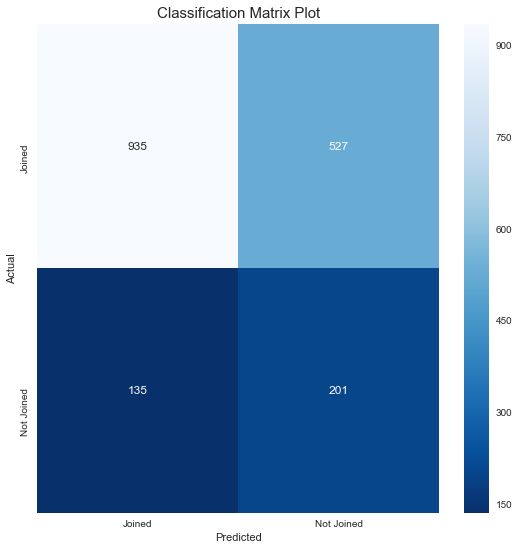

In [99]:
draw_cm( model_2_pred_test_df.actual, model_2_pred_test_df.predicted )

In [100]:
cm = metrics.confusion_matrix(model_2_pred_test_df.actual, model_2_pred_test_df.predicted)

pd.DataFrame(measure_performance(cm))

,overall_acc,precision,recall,sensitivity,specificity
0,0.63,0.87,0.64,0.64,0.6




### 6. ROC Plot on the test data

ROCR package can be used to evaluate the model performace on the test data. The same package can also be used to get the model performace on the test data.



In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

Converting the labels to 0/1 code so that it can be passed to the sklearn identifies the positive and negative class.

In [102]:
model_2_pred_test_df['predicted_code'] = model_2_pred_test_df.predicted.replace(('Joined', 'Not Joined'), (1, 0))
model_2_pred_test_df['actual_code'] = model_2_pred_test_df.actual.replace(('Joined', 'Not Joined'), (1, 0))


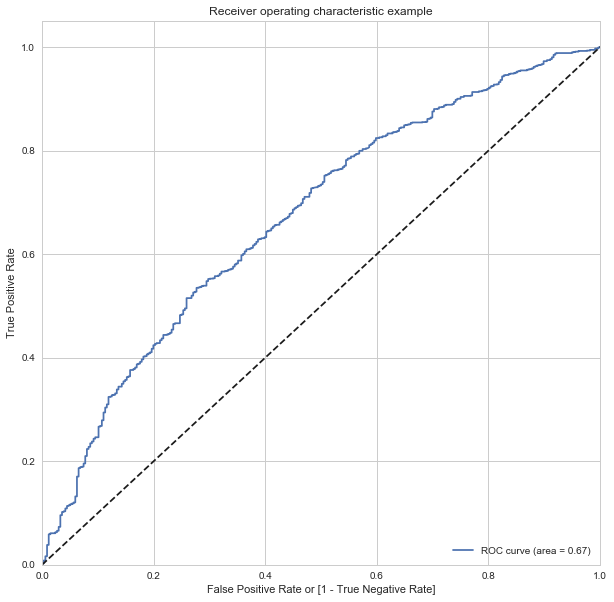

In [111]:
fpr, tpr, thresholds = draw_roc(model_2_pred_test_df.actual_code, model_2_pred_test_df.predicted_prob )

In [112]:
auc_score = metrics.roc_auc_score( model_2_pred_test_df.actual_code, model_2_pred_test_df.predicted_prob  )
round( float( auc_score ), 2 )

0.67


#### End of Document

***
***
